In [1]:
#Chargez l'ensemble de données sur le logement de Boston à partir de sklearn.datasets
from sklearn.datasets import load_boston
import seaborn as sns
boston_dataset = load_boston()

#Transformez le dataset en Dataframe
import pandas as pd

data = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)


C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing 

In [2]:
data['MEDV']=boston_dataset.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


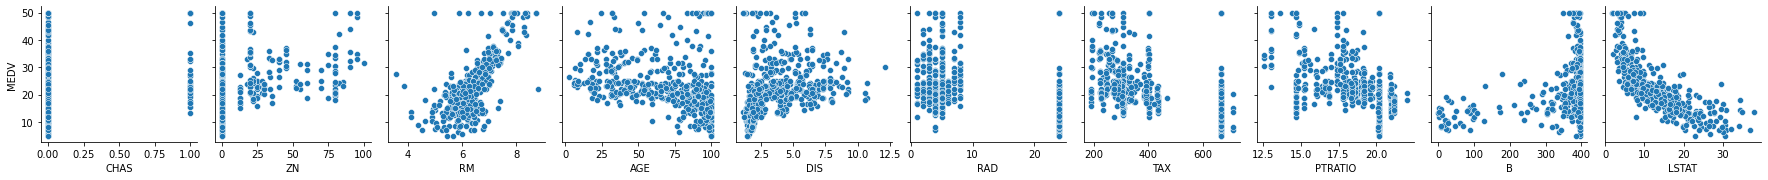

In [4]:
sns.pairplot(data, x_vars=['CHAS','ZN','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'], y_vars='MEDV')

# data preprocessing

In [5]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# features scaling

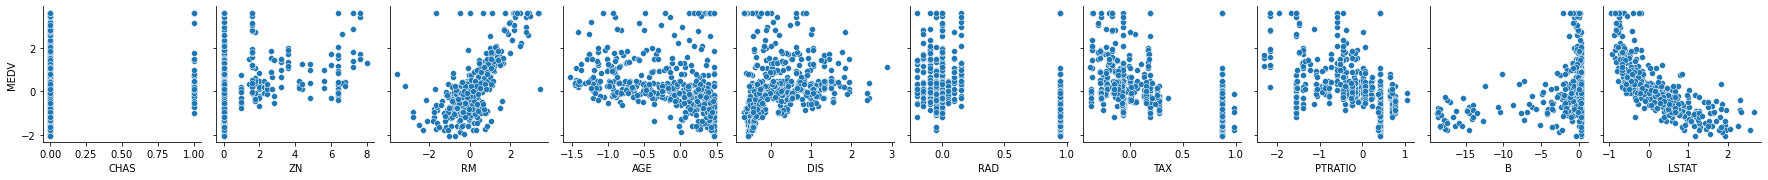

In [8]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler().fit_transform(data)
data[data.columns]=scaler
sns.pairplot(data, x_vars=['CHAS','ZN','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'], y_vars='MEDV')

# selection des caracteristiques

<AxesSubplot:>

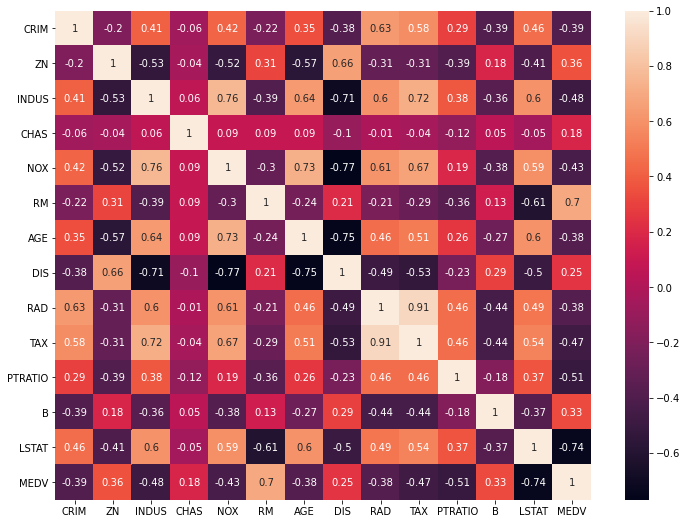

In [9]:
#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt


#Created a dataframe without the price col, since we need to see the correlation between the variables


correlation_matrix = data.corr().round(2)
plt.figure(figsize=(12, 9))

sns.heatmap(data=correlation_matrix, annot=True)

In [12]:
from sklearn.model_selection import train_test_split
#split the data 

# Diviser le dataset en 80% Train et 20% Test 
X=data.loc[:, data.columns != 'MEDV']
Y=data['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.25,random_state=1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(379, 13)
(379,)
(127, 13)
(127,)


# using lasso for selection features


Best alpha using built-in LassoCV: 0.016807
Best score using built-in LassoCV: 0.720402
Lasso picked 9 variables and eliminated the other 4 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

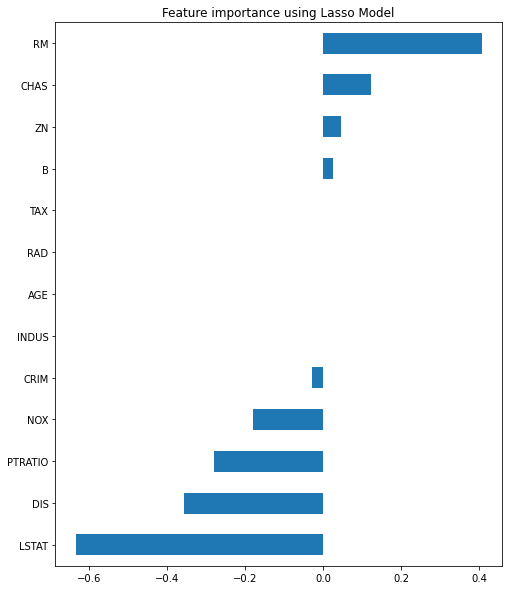

In [15]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
reg = LassoCV()
reg.fit(X, Y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,Y))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_values()

plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

# feature selection using RidgeCV()


alpha: 1.000000


Text(0.5, 1.0, 'Feature importance using ridge Model')

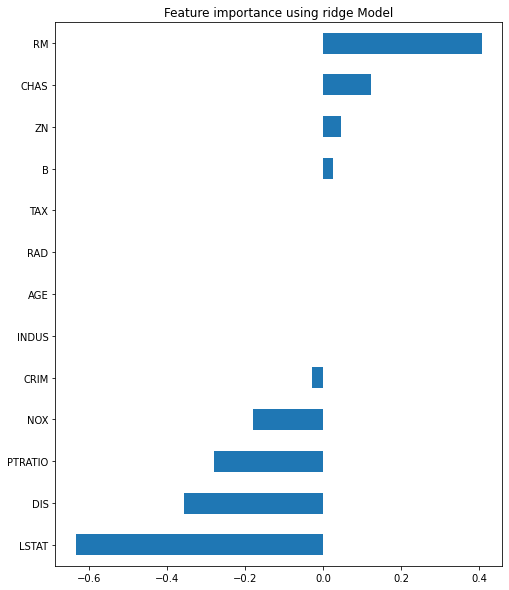

In [17]:
# define model
model = RidgeCV()
# fit model
model.fit(X, Y)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)
coef = pd.Series(reg.coef_, index = X.columns)
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using ridge Model")

# redge regression selection de parametre

In [30]:
from sklearn.model_selection import GridSearchCV
model = Ridge()
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)
# perform the search
results = search.fit(X, Y)
print('Config: %s' % results.best_params_)


Config: {'alpha': 0.99}


In [22]:
#split the data 

# Diviser le dataset en 80% Train et 20% Test 
X=data[["RM","LSTAT"]] #RM et LSTAT est deduit a partir de resultat de section des features precedentes
Y=data['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.25,random_state=1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(379, 2)
(379,)
(127, 2)
(127,)


# linear regression

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np
reg = LinearRegression()
reg.fit(X_train, y_train)

# Affichez θ0, l’ordonnée à l’origine et les coefficients
print(reg.intercept_)
print(reg.coef_)

y_train_predict_1 = reg.predict(X_train)
rmse_lineaire_train= (np.sqrt(mean_squared_error(y_train, y_train_predict_1)))
r2_lineaire_train = round(reg.score(X_train, y_train),2)
print("rmse lineaire regression train",rmse_lineaire_train)
print("R-squared_Train",r2_lineaire_train)

y_test_predict_1 = reg.predict(X_test)
rmse_lineaire_test= (np.sqrt(mean_squared_error(y_test, y_test_predict_1)))
r2_lineaire_test = round(reg.score(X_test, y_test),2)
print("rmse lineaire regression test",rmse_lineaire_test)
print("R-squared_Test",r2_lineaire_test)

0.25037670159042047
[ 0.38910824 -0.83632727]
rmse lineaire regression train 0.6954754675260022
R-squared_Train 0.61
rmse lineaire regression test 0.6978160098321226
R-squared_Test 0.69


# polynomial regression

In [25]:
# Importez PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
 # importez le modèle
from sklearn.linear_model import LinearRegression
# importez le modèle
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
# Instanciation
nb_degree=3
poly_features = PolynomialFeatures(degree=nb_degree)
#Transformez les caractéristiques existantes en caractéristiques de degré supérieur.
X_train_poly = poly_features.fit_transform(X_train)
# instantiation du modèle
model = LinearRegression()

# Entrainez le modèle sur l'ensemble d'entrainement 
model.fit(X_train_poly, y_train)
# Affichez θ0, l’ordonnée à l’origine et les coefficients
print(model.intercept_)
print(model.coef_)
# faire des prédictions sur l'ensemble de train
y_pred_train = model.predict(X_train_poly)
#Transformez les caractéristiques existantes en caractéristiques de degré supérieur.
X_test_poly = poly_features.fit_transform(X_test)
# faire des prédictions sur l'ensemble de test
y_pred_test = model.predict(X_test_poly)


polyRMSE_train=mean_squared_error(y_train,y_pred_train,squared=False)
polyR_squatd_Train=r2_score(y_train,y_pred_train)
# faire des prédictions sur l'ensemble de train
print("*****************Evaluation de la performance du modèle sur l'ensemble d'entrainement*****************")
print("RMSE_Train=",polyRMSE_train)
print("R-squared_Train=",polyR_squatd_Train)

print("*****************Evaluation de la performance du modèle sur l'ensemble de Test*****************")

print("RMSE_Test=",mean_squared_error(y_test,y_pred_test,squared=False))
print("R-squared_Test=",r2_score(y_test,y_pred_test))

0.041515610750365584
[ 0.          0.39518507 -0.91344095  0.00804023 -0.43152975  0.12252641
 -0.04468224 -0.23113418 -0.15330475 -0.06567783]
*****************Evaluation de la performance du modèle sur l'ensemble d'entrainement*****************
RMSE_Train= 0.5644127058618496
R-squared_Train= 0.744740440153394
*****************Evaluation de la performance du modèle sur l'ensemble de Test*****************
RMSE_Test= 0.5263501566893162
R-squared_Test= 0.8221232175125748


# ridge regularization

In [31]:
from sklearn.linear_model import Ridge
import numpy as np
rdg = Ridge(alpha = 0.99) ##alpha est choisit d'apres le resulta de gridsearch
rdg.fit(X_train_poly, y_train)
print(rdg.intercept_)
print(rdg.coef_)
# faire des prédictions sur l'ensemble de train
y_pred_train = rdg.predict(X_train_poly)


print("*****************Evaluation de la performance du modèle sur l'ensemble d'entrainement*****************")
print("RMSE_Train=",np.sqrt(mean_squared_error(y_train,y_pred_train)))
print("R-squared_Test=",r2_score(y_train, y_pred_train))

pred_test_rdg= rdg.predict(X_test_poly)
print("rmse: ",np.sqrt(mean_squared_error(y_test,pred_test_rdg))) 
print("R-squared_Test=",r2_score(y_test, pred_test_rdg))

0.0425085200953535
[ 0.          0.39731353 -0.90069684  0.00993337 -0.42962494  0.11435471
 -0.04453001 -0.2302985  -0.15311831 -0.06499291]
*****************Evaluation de la performance du modèle sur l'ensemble d'entrainement*****************
RMSE_Train= 0.5644419526837655
R-squared_Test= 0.7447139853119752
rmse:  0.5253634638568968
R-squared_Test= 0.8227894859247685


# Lasso Regression

In [35]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, y_train)
Lasso(alpha=0.1)
print(clf.coef_)
print(clf.intercept_)

[ 0.34975166 -0.67599488]
0.2276366329302897
